In [1]:
import os
import yaml
import pandas as pd
import datetime as dt
from copy import deepcopy
from yaml import Dumper, Loader
from random import randint
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from CORAL import SharedLibrary, GlobalManager, Pipeline

projects = os.path.join(os.getcwd(), "east_coast_analysis", "example_pipeline.csv")
base = os.path.join(os.getcwd(), "east_coast_analysis", "base.yaml")
pipeline = Pipeline(projects, base)
    
# weather = pd.read_csv("library/weather/vineyard_wind_weather_1983_2017_orbit.csv", parse_dates=['datetime']).set_index('datetime')

In [2]:
library_path = os.path.join(os.getcwd(), "east_coast_analysis", "library")

allocations = {
    "wtiv": ('example_wtiv', 2),
    "feeder": ('example_feeder', 6),
    "port": [('northeast', 1), ('central', 1), ('south', 1)],
}

In [3]:
manager = GlobalManager(pipeline.configs, allocations, library_path=library_path)
manager.run()

ORBIT library intialized at '/Users/jnunemak/miniconda3/envs/coral-dev/lib/python3.9/site-packages/library'


In [4]:
df = pd.DataFrame(manager.logs).iloc[::-1]
df = df.reset_index(drop=True).reset_index()

port_map = pipeline.projects[["name", "port_region"]].set_index("name").to_dict()['port_region']
df['port'] = [port_map[name] for name in df['name']]
df

,index,name,Initialized,Started,Finished,request-wtiv,request-port,delay-wtiv,delay-port,Date Initialized,Date Started,Date Finished,request-wtiv-date,request-port-date,port
0,0,Atlantic Shores,35064,37750.6,45151.6,37750.6,35064.0,2686.6,0.0,2025-01-01,2025-04-22 23:00:00,2026-02-25 08:00:00,2025-04-22 23:00:00,2025-01-01 00:00:00,central
1,1,Kitty Hawk,26280,37750.6,42189.2,32199.8,37750.6,5919.8,11470.6,2024-01-01,2025-04-22 23:00:00,2025-10-24 22:00:00,2024-09-03 16:00:00,2025-04-22 23:00:00,south
2,2,CVOW,26280,32196.1,37750.6,32196.1,26280.0,5916.1,0.0,2024-01-01,2024-09-03 13:00:00,2025-04-22 23:00:00,2024-09-03 13:00:00,2024-01-01 00:00:00,south
3,3,Skipjack,26280,26280.0,32199.8,26280.0,26280.0,0.0,0.0,2024-01-01,2024-01-01 00:00:00,2024-09-03 16:00:00,2024-01-01 00:00:00,2024-01-01 00:00:00,central
4,4,Mayflower Wind,17520,25535.7,32196.1,21092.1,25535.7,3572.1,8015.7,2023-01-01,2023-12-01 00:00:00,2024-09-03 13:00:00,2023-05-29 21:00:00,2023-12-01 00:00:00,northeast
5,5,Bay State Wind,17520,18134.7,25535.7,18134.7,18134.7,614.7,614.7,2023-01-01,2023-01-26 15:00:00,2023-12-01 00:00:00,2023-01-26 15:00:00,2023-01-26 15:00:00,northeast
6,6,Ocean Wind,8760,13691.1,21092.1,13691.1,13691.1,4931.1,4931.1,2022-01-01,2022-07-25 12:00:00,2023-05-29 21:00:00,2022-07-25 12:00:00,2022-07-25 12:00:00,central
7,7,South Fork,0,9252.5,18134.7,5554.5,9252.5,5554.5,9252.5,2021-01-01,2022-01-21 13:00:00,2023-01-26 15:00:00,2021-08-20 11:00:00,2022-01-21 13:00:00,northeast
8,8,Empire Wind,8760,9252.5,13691.1,9252.5,8760.0,492.5,0.0,2022-01-01,2022-01-21 13:00:00,2022-07-25 12:00:00,2022-01-21 13:00:00,2022-01-01 00:00:00,central
9,9,Revolution Wind,0,5554.5,9252.5,0.0,5554.5,0.0,5554.5,2021-01-01,2021-08-20 11:00:00,2022-01-21 13:00:00,2021-01-01 00:00:00,2021-08-20 11:00:00,northeast


(18598.0, 20539.333333333332)

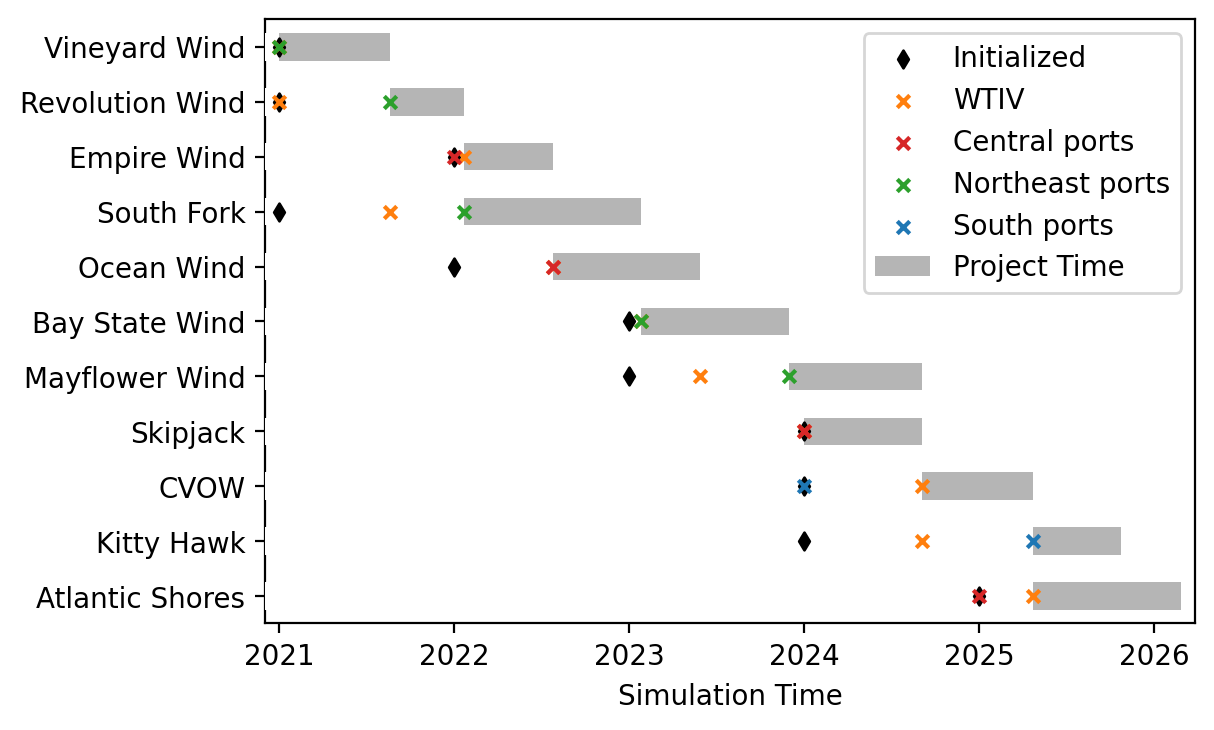

In [5]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)

color_map = {
    "northeast": "tab:green",
    "central": "tab:red",
    "south": "tab:blue"
}

df["Date Finished"].plot(kind="barh", ax=ax, zorder=4, label="Project Time", color="#B5B5B5")
df["Date Started"].plot(kind="barh", color="w", ax=ax, zorder=4, label="__nolabel__")

df.plot(kind="scatter", x="Date Initialized", y="index", color='k', ax=ax, zorder=5, label="Initialized", marker="d")
df.plot(kind="scatter", x="request-wtiv-date", y="index", color='tab:orange', ax=ax, zorder=5, label="WTIV", marker="x")

groups = df.groupby("port")
for name, group in groups:
    group.plot(kind="scatter", x="request-port-date", y="index", ax=ax, marker="x", c=color_map[name], zorder=5, label=f"{name} ports".capitalize())

ax.set_xlabel("Simulation Time")
ax.set_ylabel("")
_ = ax.set_yticklabels(df['name'])

ax.legend()

ax.set_xlim(manager._start - dt.timedelta(days=30), df["Date Finished"].max() + dt.timedelta(days=30))

In [7]:
config = {
    'wtiv': '_shared_pool_',
    'feeder': '_shared_pool_',
    'num_feeders': 2,
    'site': {'depth': 20, 'distance': 40},
    "plant": {},
    'port': "_shared_pool_",
    'turbine': "12MW_generic",
    
    "design_phases": [],
    "install_phases": ["TurbineInstallation"]
}

with open("turbine_install.yaml", "w") as f:
    yaml.dump(config, f, Dumper=Dumper)